<a href="https://colab.research.google.com/github/LaraNegri/EntregasPDI/blob/main/TP6/Practico6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico 6

Creado por: Lara Negri

## Descripción del práctico

Implementar un aplicativo que levante una imagen, la convierta a YIQ y retenga solo el Y y aplique el filtrado por convolución para los siguientes filtros:

1. Pasabajos: Plano y Bartlett 3x3, 5x5, 7x7. Gaussiano 5x5 y 7x7.
2. Detectores de bordes: Laplaciano v4 y v8. Sobel las 8 orientaciones.
3. Pasabanda, pasaaltos de frecuencia de corte 0,2 y 0,4.

Para el “cierre” de la imagen cerca de los bordes, utilizar un padding según corresponda.\
El aplicativo debe permitir cargar o seleccionar la imagen y elegir de una lista el filtro a aplicar ver su resultado. \
Adicionalmente se mostrará un plot con todos los filtros aplicados para la imagen de entrada.

## Librerias requeridas

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import imageio as io

## Funciones a utilizar

In [10]:
# Función para leer una imagen y tenerla como Array numpy sin limitación uint8
def get_image(rute):
  im = io.imread(rute)
  im = im.astype(np.int)
  return im
  
  # Obtener el canal R normalizado de una imagen
def get_R(im):
  R = im[:, :, 0]
  return R

  # Obtener el canal G normalizado de una imagen
def get_G(im):
  G = im[:, :, 1]
  return G

  # Obtener el canal B normalizado de una imagen
def get_B(im):
  B = im[:, :, 2]
  return B

def rgb_to_image(newR,newG,newB):
  Shape = newR.shape
  im_out = np.zeros((Shape[0], Shape[1], 3))
  im_out[:,:,0] = newR
  im_out[:,:,1] = newG
  im_out[:,:,2] = newB
  return im_out.astype(np.uint8)

def plot_finalim(newR,newG,newB):
  finalim = rgb_to_image(newR,newG,newB)
  plt.imshow(finalim)
  plt.show()

## Selección de Imagen

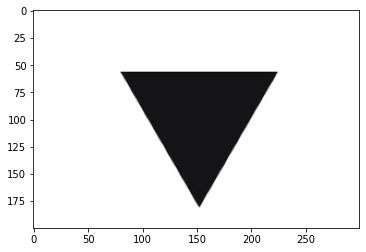

In [11]:
#@title Selecccione la imagen { run: "auto" }

circle = 'http://billjohnsononline.com/wp-content/uploads/2017/03/The-Black-Dot-Experiment-e1490060434852.jpg'
triangle ='http://www.pmlive.com/__data/assets/image/0008/451799/MHRA_black_triangle_symbol.jpg'
elipse = 'https://img.freepik.com/iconos-gratis/elipse-geometrico_318-10353.jpg?size=338&ext=jpg'
fruits = 'https://www.lavanguardia.com/files/og_thumbnail/uploads/2019/06/04/5e99794702a16.jpeg'
Imagen = 'triangle' #@param ["circle", "triangle", "elipse", "fruits"]

if Imagen == 'circle':
  im = get_image(circle)
  plt.imshow(im, 'gray') 
  plt.show()
elif Imagen == 'triangle':
  im = get_image(triangle)
  plt.imshow(im, 'gray') 
  plt.show()
elif Imagen == 'elipse':
  im = get_image(elipse)
  plt.imshow(im, 'gray') 
elif Imagen == 'fruits':
  im = get_image(fruits)
  plt.imshow(im, 'gray') 
  plt.show()

In [12]:
 # Obtenemos la luminancia Y de la imagen

#Primero necesito los valores de R, G, B de las imágenes

R = get_R(im)/255
G = get_G(im)/255
B = get_B(im)/255

#Obtengo los valores de YIQ
Y = (0.299*R + 0.587*G + 0.114*B)
I = 0.595716*R + -0.274453*G + -0.321263*B
Q = 0.211456*R + -0.522591*G + 0.311135*B

Y = np.array(np.clip(Y, 0, 1))

In [13]:
#Defino matrices

#@title Selecccione el filtro { run: "auto" }
PlanoPB = np.array([[1/9, 1/9, 1/9],
                    [1/9, 1/9, 1/9],
                    [1/9, 1/9, 1/9]])

Bartlett3 = np.array([[1/16, 2/16, 1/16],
                      [2/16, 4/16, 2/16],
                      [1/16, 2/16, 1/16]])

Bartlett5 = np.array([[1/81, 2/81, 3/81, 2/81, 1/81],
                      [2/81, 4/81, 6/81, 4/81, 2/81],
                      [3/81, 6/81, 9/81, 6/81, 3/81],
                      [2/81, 4/81, 6/81, 4/81, 2/81],
                      [1/81, 2/81, 3/81, 2/81, 1/81]])

Bartlett7 = np.array([[1/288, 2/288, 3/288, 4/288, 3/288, 2/288, 1/288],
                      [2/288, 4/288, 6/288, 8/288, 6/288, 4/288, 2/288],
                      [3/288, 6/288, 9/288, 12/288, 9/288, 6/288, 3/288],
                      [4/288, 8/288, 12/288, 16/288, 12/288, 8/288, 4/288],
                      [3/288, 6/288, 9/288, 12/288, 9/288, 6/288, 3/288],
                      [2/288, 4/288, 6/288, 8/288, 6/288, 4/288, 2/288],
                      [1/288, 2/288, 3/288, 4/288, 3/288, 2/288, 1/288]])

Gauss5 =  np.array([ [1/256, 4/256, 6/256, 4/256, 1/256],
                    [4/256, 16/256, 24/256, 16/256, 4/256],
                    [6/256, 24/256, 36/256, 24/256, 6/256],
                    [4/256, 16/256, 24/256, 16/256, 4/256],
                    [1/256, 4/256, 6/256, 4/256, 1/256] ])

Gauss7 =  np.array([ [1/4096, 6/4096, 15/4096, 20/4096, 15/4096, 6/4096, 1/4096],
                    [6/4096, 36/4096, 90/4096, 120/4096, 90/4096, 36/4096, 6/4096],
                    [15/4096, 90/4096, 225/4096, 300/4096, 225/4096, 90/4096, 15/4096],
                    [20/4096, 120/4096, 300/4096, 400/4096, 300/4096, 120/4096, 20/4096],
                    [15/4096, 90/4096, 225/4096, 300/4096, 225/4096, 90/4096, 15/4096],
                    [6/4096, 36/4096, 90/4096, 120/4096, 90/4096, 36/4096, 6/4096],
                    [1/4096, 6/4096, 15/4096, 20/4096, 15/4096, 6/4096, 1/4096] ])

Laplacianov4 = np.array([[0, -1, 0],
                        [-1, 4, -1],
                        [0, -1, 0]])

Laplacianov8 = np.array([[-1, -1, -1],
                        [-1, 8, -1],
                        [-1, -1, -1]])

SobelO = np.array([[-1, 0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]])

SobelE = np.array([[1, 0, -1],
                  [2, 0, -2],
                  [1, 0, -1]])

SobelS = np.array([[1, 2, 1],
                  [0, 0, 0],
                  [-1, -2, -1]])

SobelN = np.array([[-1, -2, -1],
                  [0, 0, 0],
                  [1, 2, 1]])

SobelNE =  np.array([[0, -1, -2],
                    [1, 0, -1],
                    [2, 1, 0]])

SobelNO = np.array([[-2, -1, 0],
                  [-1, 0, 1],
                  [0, 1, 2]])

SobelSE = np.array([[0, 1, 2],
                  [-1, 0, 1],
                  [-2, -1, 0]])

SobelSO = np.array([[2, 1, 0],
                  [1, 0, -1],
                  [0, -1, -2]])

PasaAlto02 = np.array([[1, -4, 6, -4, 1],
                      [-4, 16, -24, 16, -4],
                      [6, -24, 36, -24, 6],
                      [-4, 16, -24, 16, -4],
                      [1, -4, 6, -4, 1]])

PasaAlto04 = np.array([[1, 4, -10, 4, 1],
                      [4, 16, -40, 16, 4],
                      [-10, -40, 100, -40, -10],
                      [4, 16, -40, 16, 4],
                      [1, 4, -10, 4, 1]])

PasaBanda = np.array([[1, 0, -2, 0, 1],
                      [0, 0, 0, 0, 0],
                      [-2, 0, 4, 0, -2],
                      [0, 0, 0, 0, 0],
                      [1, 0, -2, 0, 1]])

kernel = 'PlanoPB' #@param ["PlanoPB", "Bartlett3", "Bartlett5", "Bartlett7", "Gauss5", "Gauss7", "Laplacianov4", "Laplacianov8", "SobelN", "SobelS", "SobelE", "SobelO", "SobelNE", "SobelNO", "SobelSE", "SobelSO", "PasaAlto02", "PasaAlto04", "PasaBanda"]

In [14]:
if kernel == 'PlanoPB':
  kernel = PlanoPB
elif kernel == 'Bartlett3':
  kernel = Bartlett3
elif kernel == 'Bartlett5':
  kernel = Bartlett5
elif kernel == 'Bartlett7':
  kernel = Bartlett7
elif kernel == 'Gauss5':
  kernel = Gauss5
elif kernel == 'Gauss7':
  kernel = Gauss7
elif kernel == 'Laplacianov4':
  kernel = Laplacianov4
elif kernel == 'Laplacianov8':
  kernel = Laplacianov8
elif kernel == 'SobelN':
  kernel = SobelN
elif kernel == 'SobelS':
  kernel = SobelS
elif kernel == 'SobelE':
  kernel = SobelE
elif kernel == 'SobelO':
  kernel = SobelO
elif kernel == 'SobelNE':
  kernel = SobelNE
elif kernel == 'SobelNO':
  kernel = SobelNO
elif kernel == 'SobelSE':
  kernel = SobelSE
elif kernel == 'SobelSO':
  kernel = SobelSO
elif kernel == 'PasaAltoa02':
  kernel = PasaAlto02
elif kernel == 'PasaAlto04':
  kernel = PasaAlto04
elif kernel == 'PasaBanda':
  kernel = PasaBanda

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


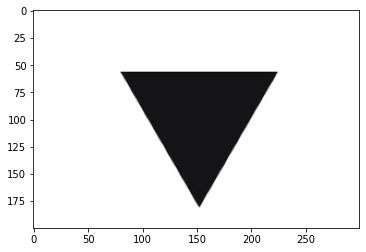

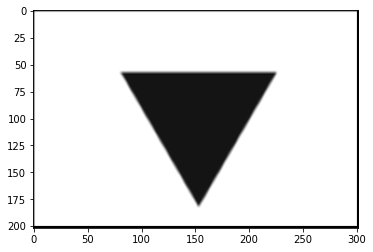

In [15]:
#Recorremos la imagen pixel a pixel
#Defino el tamaño de la matriz
print(kernel)
x, z = Y.shape

q, r = kernel.shape

if q == 3:
  Y = np.pad(Y, [(1, 1), (1, 1)], mode='constant', constant_values=0)

  l, m = Y.shape
  finalM = np.zeros((l, m), dtype=np.float)

elif q == 5:
  Y = np.pad(Y, [(2, 2), (2, 2)], mode='constant', constant_values=0)

  l, m = Y.shape
  finalM = np.zeros((l, m), dtype=np.float)
  
elif q == 7:
  Y = np.pad(Y, [(3, 3), (3, 3)], mode='constant', constant_values=0)

  l, m = Y.shape
  finalM = np.zeros((l, m), dtype=np.float)

for i in range(x):
  for j in range(z):
   if q == 3:

     finalM[i,j] = np.sum( np.multiply(np.array([[Y[i-1,j-1], Y[i-1,j], Y[i-1,j+1]],
                                   [Y[i,j-1], Y[i,j], Y[i,j+1]],
                                   [Y[i+1,j-1], Y[i+1,j], Y[i+1,j+1]]]), kernel))

   elif q == 5:

     finalM[i,j] = np.sum(np.multiply(np.array([[Y[i-2,j-2], Y[i-2,j-1], Y[i-2,j], Y[i-2,j+1], Y[i-2,j+2] ],
                                  [Y[i-1,j-2], Y[i-1,j-1], Y[i-1,j], Y[i-1,j+1], Y[i-1,j+2]],
                                  [Y[i,j-2], Y[i,j-1], Y[i,j], Y[i,j+1], Y[i,j+2]],
                                  [Y[i+1,j-2], Y[i+1,j-1], Y[i+1,j], Y[i+1,j+1], Y[i+1,j+2]],
                                  [Y[i+2,j-2], Y[i+2,j-1], Y[i+2,j], Y[i+2,j+1], Y[i+2,j+2]]
                                  ]), kernel))
   elif q == 7:

     finalM[i,j] = np.sum( np.multiply(np.array([[ Y[i-3,j-3],Y[i-3,j-2], Y[i-3,j-3], Y[i-3,j], Y[i-3,j+1], Y[i-3,j+2], Y[i-3,j+3]],
                                  [ Y[i-2,j-3],Y[i-2,j-2], Y[i-2,j-3], Y[i-2,j], Y[i-2,j+1], Y[i-2,j+2], Y[i-2,j+3]],
                                  [ Y[i-1,j-3],Y[i-1,j-2], Y[i-1,j-3], Y[i-1,j], Y[i-1,j+1], Y[i-1,j+2], Y[i-1,j+3]],
                                  [ Y[i,j-3],Y[i,j-2], Y[i,j-3], Y[i,j], Y[i,j+1], Y[i,j+2], Y[i,j+3]],
                                  [ Y[i+1,j-3],Y[i+1,j-2], Y[i+1,j-3], Y[i+1,j], Y[i+1,j+1], Y[i+1,j+2], Y[i+1,j+3]],
                                  [ Y[i+2,j-3],Y[i+2,j-2], Y[i+2,j-3], Y[i+2,j], Y[i+2,j+1], Y[i+2,j+2], Y[i+2,j+3]],
                                  [ Y[i+3,j-3],Y[i+3,j-2], Y[i+3,j-3], Y[i+3,j], Y[i+3,j+1], Y[i+3,j+2], Y[i+3,j+3]]]), kernel))
finalM = np.clip(finalM, 0, 1) 
      
plt.imshow(im, 'gray')
plt.show()
plt.imshow(finalM,'gray')
plt.show()

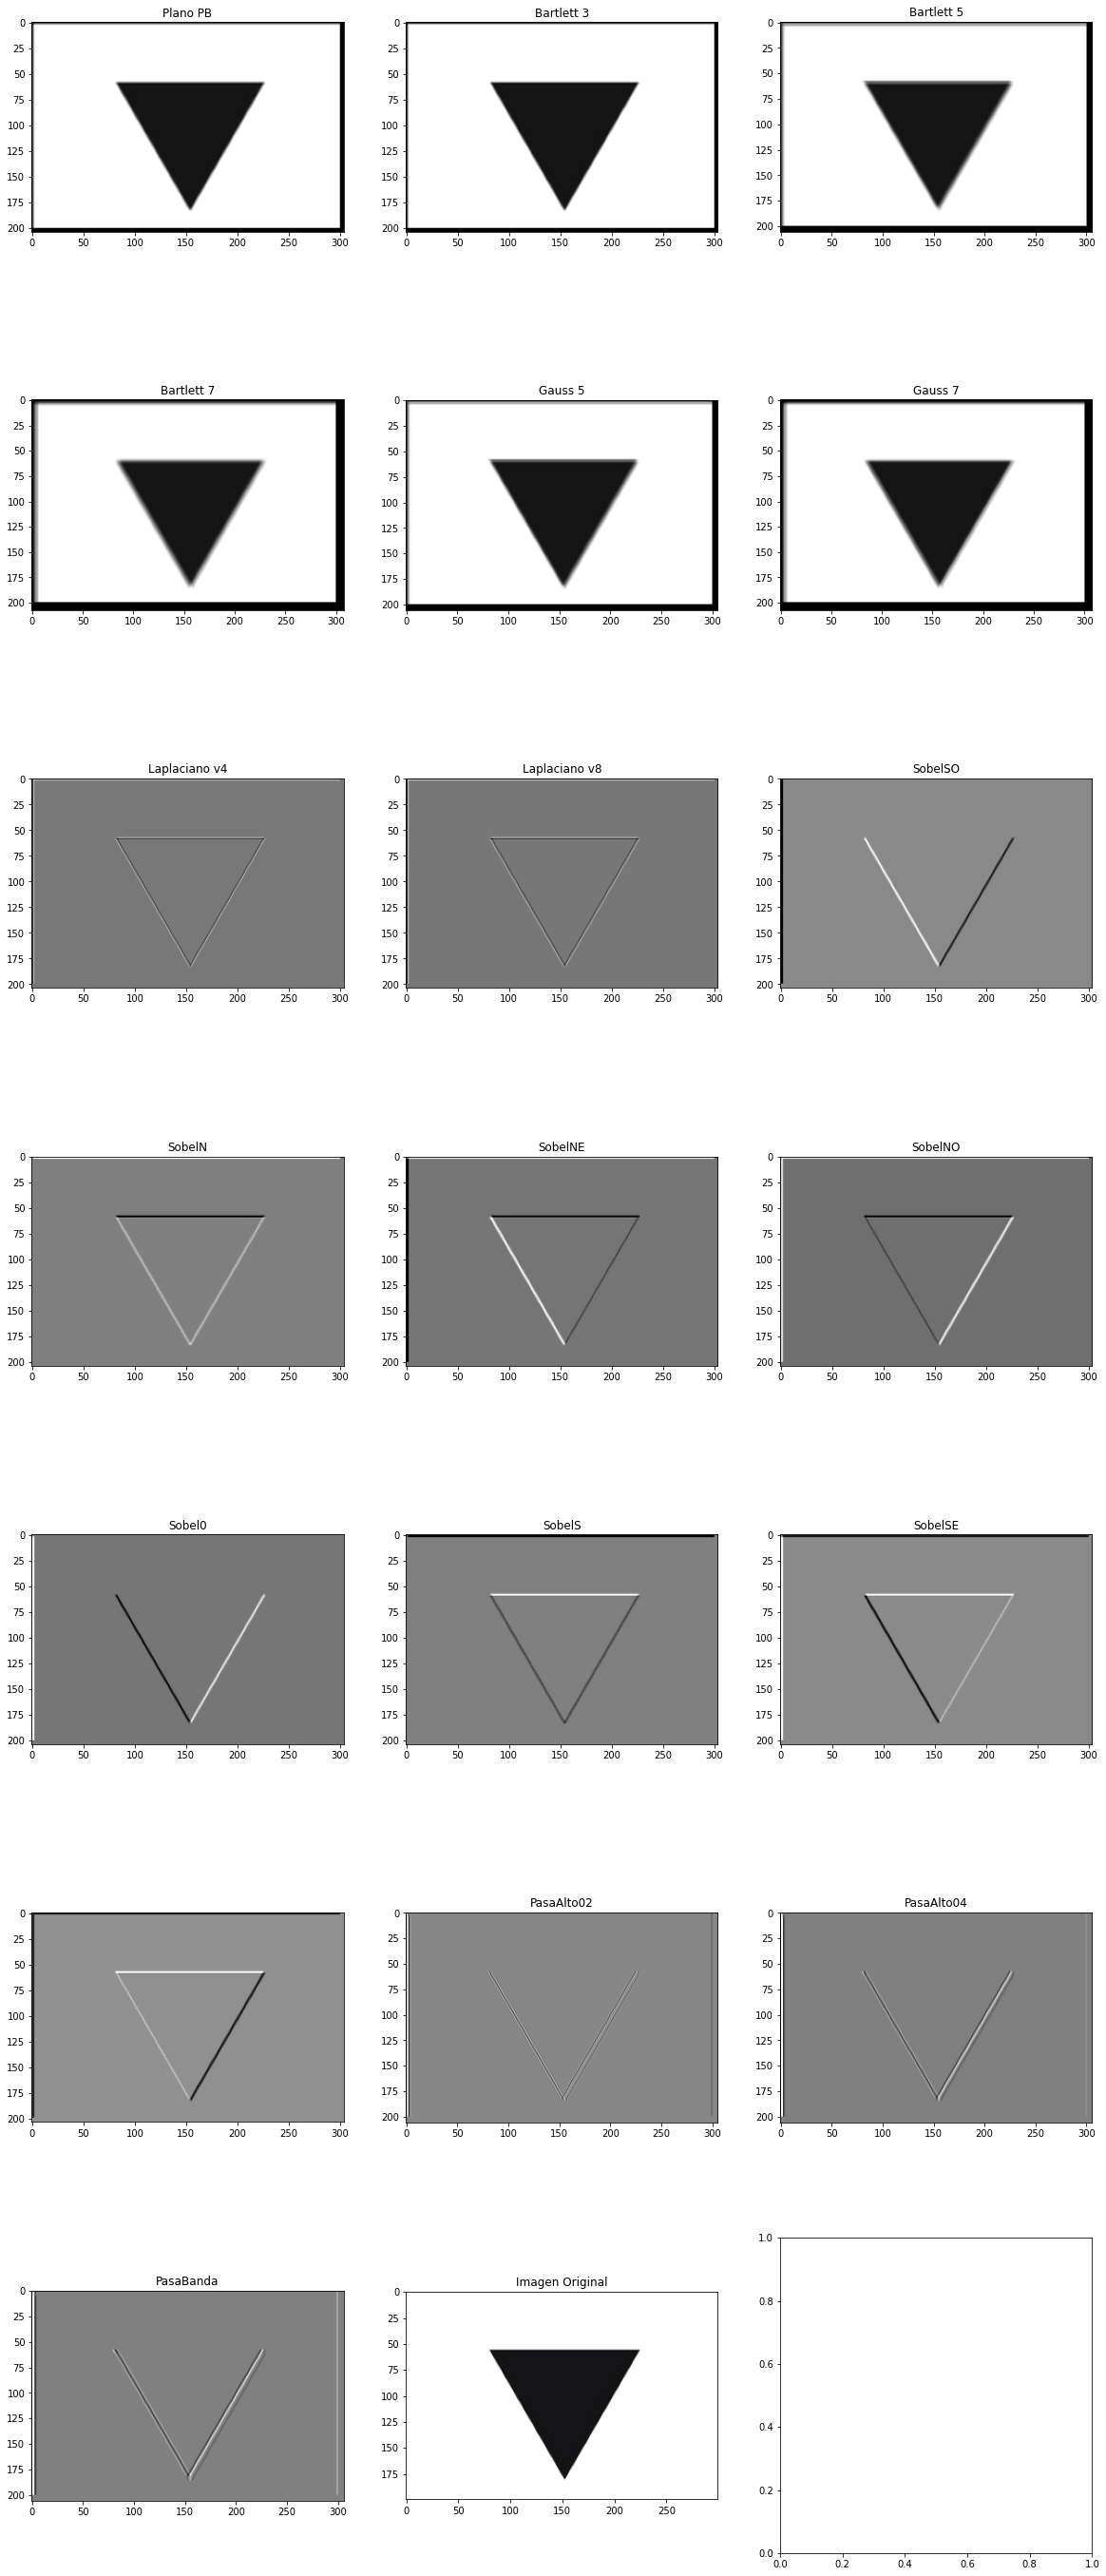

In [16]:
#Plot final con todos los filtros a la vez

kernels = [PlanoPB, Bartlett3, Bartlett5, Bartlett7, Gauss5, Gauss7, Laplacianov4, Laplacianov8, SobelE, SobelN, SobelNE, SobelNO, SobelO, SobelS, SobelSE, SobelSO, PasaAlto02, PasaAlto04, PasaBanda]

plots = []

for filtro in kernels:
  q, r = filtro.shape

  if q == 3:
    Ypad = np.pad(Y, [(1, 1), (1, 1)], mode='constant', constant_values=0)

    l, m = Ypad.shape
    finalM = np.zeros((l, m), dtype=np.float)

  elif q == 5:
    Ypad = np.pad(Y, [(2, 2), (2, 2)], mode='constant', constant_values=0)

    l, m = Ypad.shape
    finalM = np.zeros((l, m), dtype=np.float)
    
  elif q == 7:
    Ypad = np.pad(Y, [(3, 3), (3, 3)], mode='constant', constant_values=0)

    l, m = Ypad.shape
    finalM = np.zeros((l, m), dtype=np.float)

  for i in range(x):
    for j in range(z):
      if q == 3:

        finalM[i,j] = np.sum(np.array([[Ypad[i-1,j-1], Ypad[i-1,j], Ypad[i-1,j+1]],
                                      [Ypad[i,j-1], Ypad[i,j], Ypad[i,j+1]],
                                      [Ypad[i+1,j-1], Ypad[i+1,j], Ypad[i+1,j+1]]]) * filtro)

      elif q == 5:

        finalM[i,j] = np.sum(np.array([[Ypad[i-2,j-2], Ypad[i-2,j-1], Ypad[i-2,j], Ypad[i-2,j+1], Ypad[i-2,j+2] ],
                                      [Ypad[i-1,j-2], Ypad[i-1,j-1], Ypad[i-1,j], Ypad[i-1,j+1], Ypad[i-1,j+2]],
                                      [Y[i,j-2], Y[i,j-1], Y[i,j], Y[i,j+1], Y[i,j+2]],
                                      [Ypad[i+1,j-2], Ypad[i+1,j-1], Ypad[i+1,j], Ypad[i+1,j+1], Ypad[i+1,j+2]],
                                      [Ypad[i+2,j-2], Ypad[i+2,j-1], Ypad[i+2,j], Ypad[i+2,j+1], Ypad[i+2,j+2]]
                                      ]) * filtro)
      elif q == 7:
        
        finalM[i,j] = np.sum(np.array([[ Ypad[i-3,j-3],Ypad[i-3,j-2], Ypad[i-3,j-3], Ypad[i-3,j], Ypad[i-3,j+1], Ypad[i-3,j+2], Ypad[i-3,j+3]],
                                  [ Ypad[i-2,j-3],Ypad[i-2,j-2], Ypad[i-2,j-3], Ypad[i-2,j], Ypad[i-2,j+1], Ypad[i-2,j+2], Ypad[i-2,j+3]],
                                  [ Ypad[i-1,j-3],Ypad[i-1,j-2], Ypad[i-1,j-3], Ypad[i-1,j], Ypad[i-1,j+1], Ypad[i-1,j+2], Ypad[i-1,j+3]],
                                  [ Ypad[i,j-3],Ypad[i,j-2], Ypad[i,j-3], Ypad[i,j], Ypad[i,j+1], Ypad[i,j+2], Ypad[i,j+3]],
                                  [ Ypad[i+1,j-3],Ypad[i+1,j-2], Ypad[i+1,j-3], Ypad[i+1,j], Ypad[i+1,j+1], Ypad[i+1,j+2], Ypad[i+1,j+3]],
                                  [ Ypad[i+2,j-3],Ypad[i+2,j-2], Ypad[i+2,j-3], Ypad[i+2,j], Ypad[i+2,j+1], Ypad[i+2,j+2], Ypad[i+2,j+3]],
                                  [ Ypad[i+3,j-3],Ypad[i+3,j-2], Ypad[i+3,j-3], Ypad[i+3,j], Ypad[i+3,j+1], Ypad[i+3,j+2], Ypad[i+3,j+3]]]) * filtro)
  plots.append(finalM)
  finalM = np.clip(finalM, 0, 1) 

fig, ax = plt.subplots(7,3)
fig.set_size_inches(20,50)
ax[0,0].imshow(plots[0], 'gray')
ax[0,0].set_title('Plano PB')
ax[0,1].imshow(plots[1], 'gray')
ax[0,1].set_title('Bartlett 3')
ax[0,2].imshow(plots[2], 'gray')
ax[0,2].set_title('Bartlett 5')

ax[1,0].imshow(plots[3], 'gray')
ax[1,0].set_title('Bartlett 7')
ax[1,1].imshow(plots[4], 'gray')
ax[1,1].set_title('Gauss 5')
ax[1,2].imshow(plots[5], 'gray')
ax[1,2].set_title('Gauss 7')

ax[2,0].imshow(plots[6], 'gray')
ax[2,0].set_title('Laplaciano v4')
ax[2,1].imshow(plots[7], 'gray')
ax[2,1].set_title('Laplaciano v8')
ax[2,2].imshow(plots[8], 'gray')
ax[2,2].set_title('SobelE')

ax[3,0].imshow(plots[9], 'gray')
ax[3,0].set_title('SobelN')
ax[3,1].imshow(plots[10], 'gray')
ax[3,1].set_title('SobelNE')
ax[3,2].imshow(plots[11], 'gray')
ax[3,2].set_title('SobelNO')

ax[4,0].imshow(plots[12], 'gray')
ax[4,0].set_title('Sobel0')
ax[4,1].imshow(plots[13], 'gray')
ax[4,1].set_title('SobelS')
ax[4,2].imshow(plots[14], 'gray')
ax[4,2].set_title('SobelSE')

ax[5,0].imshow(plots[15], 'gray')
ax[2,2].set_title('SobelSO')
ax[5,1].imshow(plots[16], 'gray')
ax[5,1].set_title('PasaAlto02')
ax[5,2].imshow(plots[17], 'gray')
ax[5,2].set_title('PasaAlto04')

ax[6,0].imshow(plots[18], 'gray')
ax[6,0].set_title('PasaBanda')
ax[6,1].imshow(im, 'gray')
ax[6,1].set_title('Imagen Original')
plt.show()

## Conclusiones

En primer lugar, podemos ver a simple vista que los filtros PlanoPB, Bartlett3 y Gauss5, no generan demasiados cambios en la imagen. Por el contrario, los filtros más "fuertes" son Bartlett5, Bartlett7 y Gauss7, donde la "difuminación" de la imagen es apreciable a simple vista.

Por otro lado, tanto los efectos de Laplacianov4 y Laplacianov8 para determinar los bordes de la imagen pueden apreciarse a simple vista, y vemos que hacen un buen trabajo en delimitar las figuras presentes.

En cuanto a los filtros Sobel en todas sus direcciones, vemos que también devuelven un buen resultado.

Por último, el filtro PasaAlto02, dependiendo de la imagen y de la "variedad" de frecuencia que esta presente, puede resultarnos o no útil. El filtro PasaAlto04, al tener un límite de corte más alto, resulta en mi opinión más útil, ya que nos asegura que casi en cualquier imagen vamos a poder ver los bordes de las figuras presentes, ya que permite el paso de mayor cantidad de frecuencias. En cuanto al filtro PasaBanda vemos que aparece una difuminación de la imagen. 

En cuanto al código y su funcionamiento, se vuelve muy evidente, con imágenes grandes, que el utilizar tantos ciclos for y condicionales if, se vuelve muy lento, por lo que sería interesante buscar una forma más eficiente de realizar la convolución. 